# Bienvenidos al programa para generar gifs de parametrizaciones

### Para empezar instalaremos y precompilaremos unas librerías que necesitamos.

Dale click a la siguiente celda y después al botón de "play".

In [5]:
using Pkg
Pkg.add("Plots")
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


Una vez que termine de hacer toda el relajito (te darás cuenta porque el asterisco que aparece a la izuierda del cuadrado desaparece y en su lugar aparece un número), vamos a hacer algo que se llama "precompilar" una de las librerías que acabamos de instalar.

In [7]:
using Plots

## Hipocicloide

### Parámetros

In [63]:
r = 2 #Radio del círculo externo.
R = 7 #Radio del círculo interno.
n = 100 #Número de imágenes para generar la animación (el gif).

100

### Intervalo en el cual varía t

In [58]:
ti = 0
tf = 2*pi

12.566370614359172

### Zoom o tamaño de los ejes

In [61]:
xi = -6
xf = 6
yi = -6
yf = 6

6

### Generación del GIF (hipocicloide)

┌ Info: Saved animation to 
│   fn = /Users/e/tmp.gif
└ @ Plots /Users/e/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/e/tmp.gif")
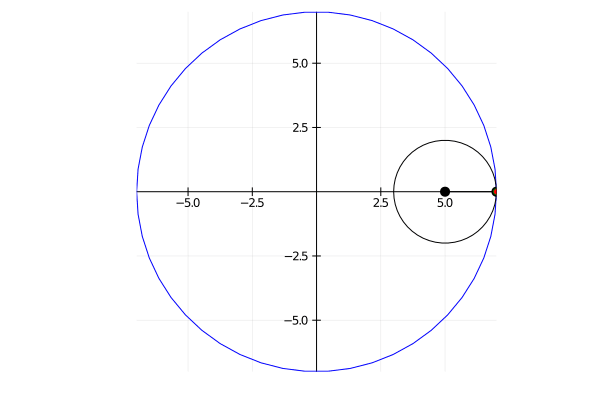

In [64]:
th = Array(ti:tf/n:tf+tf/100)
X = (R)*cos.(th)
Y = (R)*sin.(th)

# Vamos a iterar con una variable que se llama i
anim = @animate for i in 1:n

    # initialize plot with 4 series
    plt=plot(5,xlim=((xi-1),xf+1),ylim=(yi-1,yf+1), c=:red, aspect_ratio=1,legend=false, framestyle=:origin)

    # El círculo externo fijo
    plot!(plt, X,Y, c=:blue, legend=false)    
    
    # Generamos un intervalo para tener ciertas curvas desde ti hasta ti + i/n
    t = th[1:i]
    
    # El círculo chico fijo
    xc = (R-r)*cos(t[end]) .+ r*cos.(th)
    yc = (R-r)*sin(t[end]) .+ r*sin.(th)
    plot!(xc,yc,c=:black)
    
    # Parte de la hipocicloide como función de t desde ti hasta ti + i/n
    x = (R-r)*cos.(t) + r*cos.(((R-r)/r)*t)
    y = (R-r)*sin.(t) - r*sin.(((R-r)/r)*t)
    plot!(x,y, c=:red)

    # La línea que va siguiendo al punto... básicamente es una línea entre dos puntos
    xl = transpose([(R-r)*cos(t[end]) x[end]])
    yl = transpose([(R-r)*sin(t[end]) y[end]])
    plot!(xl,yl,markershape=:circle,markersize=6,c=:black)
    scatter!([x[end]],[y[end]],c=:red, markerstrokecolor=:green)

end

gif(anim)

